In [28]:
import pandas as pd
path="datasets/babynames/yob1880.txt"
names1880=pd.read_csv(path,names=["name","sex","births"])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [29]:
names1880.groupby("sex").size()

sex
F     942
M    1058
dtype: int64

In [30]:
names1880.groupby("sex").sum()

,births
sex,
F,90993
M,110493


### pandas: concat

In [31]:
import numpy as np
years=np.arange(1880,2011)
pieces=[]
columns=["names","sex","births"]
for year in years:
    path="datasets/babynames/yob"+str(year)+".txt"
    piece=pd.read_csv(path,names=columns)
    piece["year"]=year
    pieces.append(piece)
data=pd.concat(pieces,ignore_index=True)
data.head()

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### pandas: pivot table

In [32]:
births_by_year=data.pivot_table("births",index="year",columns="sex",aggfunc="sum")
births_by_year.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


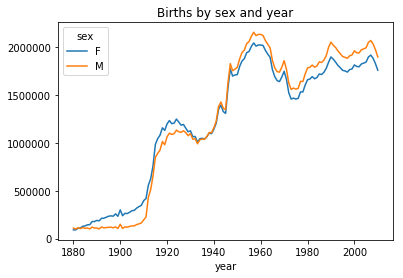

In [33]:
%matplotlib inline
births_by_year.plot(title="Births by sex and year")

### pandas: apply

In [34]:
def add_prop(group):
    group["prop"]=group.births/group.births.sum()
    
    return group
data_=data.groupby(["year","sex"]).apply(add_prop)
data_.head()

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


### np.allclose

In [35]:
np.allclose(data_.groupby(["year","sex"]).prop.sum(),1)

True

In [36]:
def top1000(group):
    return group.sort_index(by="births",ascending=False)[:1000]
grouped=data_.groupby(["year","sex"])
top1000=grouped.apply(top1000)
top1000.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


names sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

### pandas: pivot_table

In [30]:
total_births=top1000.pivot_table("births",index="year",columns="names",aggfunc="sum")
total_births.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


names,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [32]:
subset=total_births[["John","Harry","Mary","Marilyn"]]
subset.head()

names,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EAFF33BA8>,
      dtype=object)

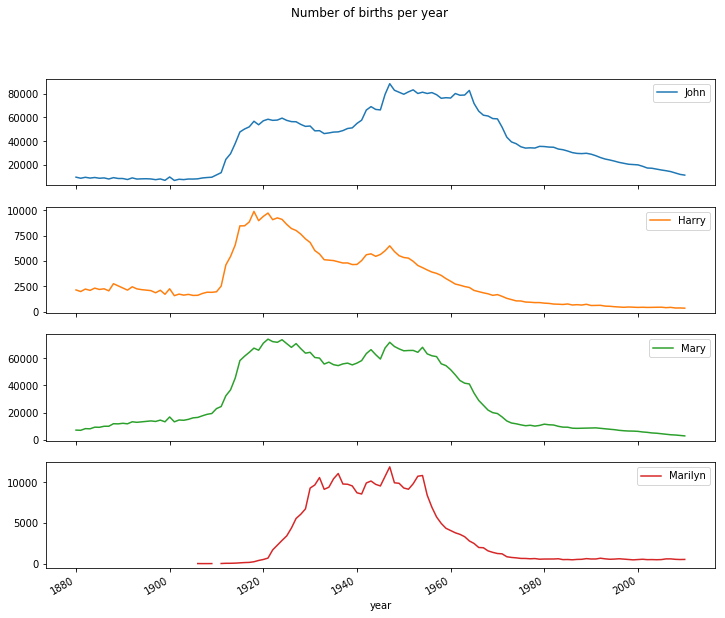

In [33]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


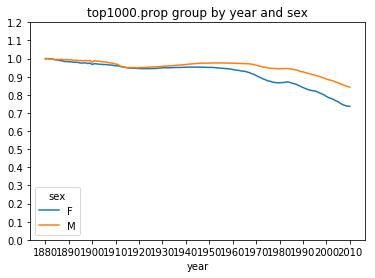

In [37]:
props_table=top1000.pivot_table("prop",index="year",columns="sex",aggfunc="sum")
props_table.plot(title="top1000.prop group by year and sex",
                yticks=np.linspace(0,1.2,13),xticks=np.arange(1880,2020,10))

In [38]:
boys=top1000[top1000.sex=="M"]
girls=top1000[top1000.sex=="F"]

In [39]:
boys_2010=boys[boys.year==2010]
boys_2010_cumsum=boys_2010.sort_index(by="prop",ascending=False).prop.cumsum()
boys_2010_cumsum.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
Name: prop, dtype: float64

In [41]:
boys_2010_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [43]:
boys_1900=boys[boys.year==1900]
boys_1900_cumsum=boys_1900.sort_index(by="prop",ascending=False).prop.cumsum()
boys_1900_cumsum.searchsorted(0.5)

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


array([24], dtype=int64)

### pandas: apply

In [46]:
def quantile_count(group,q=0.5):
    tmp=group.sort_index(by="prop",ascending=False).prop.cumsum()
    return tmp.searchsorted(q)[0]+1
diversity=top1000.groupby(["year","sex"]).apply(quantile_count)


C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [49]:
diversity=diversity.unstack("sex")
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


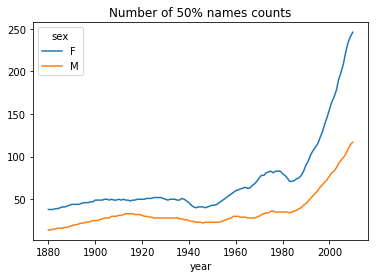

In [50]:
diversity.plot(title="Number of 50% names counts")

### pandas: lambda

In [37]:
get_last_letter=lambda x:x[-1]
last_letters=data.names.map(get_last_letter)
last_letters.name="last_letter"
data["last_letter"]=last_letters
data.head()


,names,sex,births,year,last_letter
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e


In [38]:
table=data.pivot_table("births",index="last_letter",columns=["sex","year"],aggfunc="sum")
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  

[5 rows x 262 columns]

In [39]:
subtable=table.reindex(columns=[1910,1960,2010],level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [40]:
letter_prop=subtable/subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

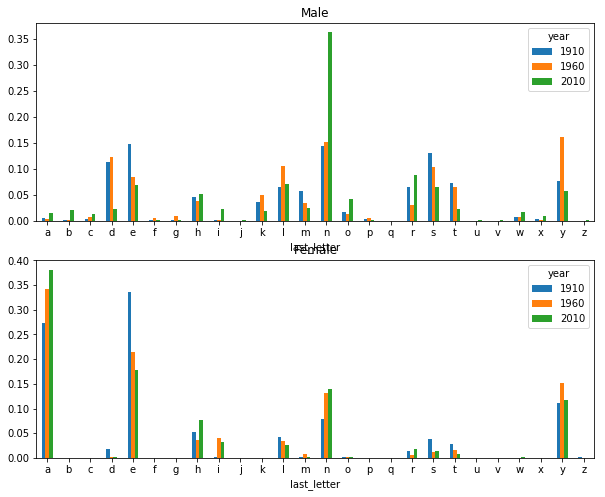

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop["M"].plot(kind="bar",rot=0,ax=axes[0],title="Male")
letter_prop["F"].plot(kind="bar",rot=0,ax=axes[1],title="Female")


In [42]:
letter_prop=data.pivot_table("births",index="last_letter",columns=["sex","year"],aggfunc="sum")
dny_ts=letter_prop.ix[["d","n","y"],"M"].T
dny_ts.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


last_letter,d,n,y
year,,,
1880,9177.0,16929.0,8371.0
1881,8387.0,15436.0,7803.0
1882,9702.0,17003.0,8815.0
1883,8796.0,15867.0,8281.0
1884,9856.0,17157.0,9202.0


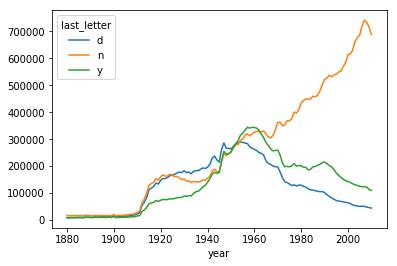

In [43]:
dny_ts.plot()

### pandas: unique

In [60]:
all_names=top1000.names.unique()
les_likes=[n for n in all_names if "lesl" in n.lower() ]
les_likes

['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly']

In [63]:
filtered=top1000[top1000["names"].isin(les_likes)]


In [67]:
filtered.groupby("names").births.sum()
filtered.head()

names sex  births  year      prop
year sex                                         
1880 F   654   Leslie   F       8  1880  0.000088
     M   1108  Leslie   M      79  1880  0.000715
1881 F   2523  Leslie   F      11  1881  0.000120
     M   3072  Leslie   M      92  1881  0.000913
1882 F   4593  Leslie   F       9  1882  0.000083

In [71]:
table=filtered.pivot_table("births",index="year",columns=["sex"],aggfunc="sum")
table=table.div(table.sum(1),axis=0)
table.head()

C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\ZMJ\Anaconda3\envs\py35\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


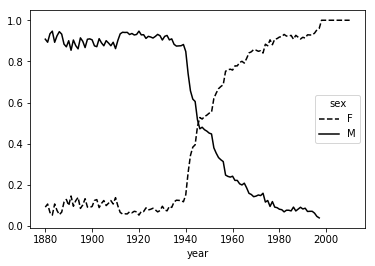

In [72]:
table.plot(style={"M":"k-","F":"k--"})